# 3. Working on IRIS data set

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
sns.set(color_codes = True)


# 2.1 Loading the data into the data frame

In [15]:
dataset = datasets.load_iris()
data = pd.DataFrame(dataset['data'],columns=['petal length','petal width','sepal length','sepal width'])
data['Species']=dataset['target']
data['Species']= data['Species'].apply(lambda x: dataset['target_names'][x])
data.head(10)

,petal length,petal width,sepal length,sepal width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [16]:
data.describe()

,petal length,petal width,sepal length,sepal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
petal length    150 non-null float64
petal width     150 non-null float64
sepal length    150 non-null float64
sepal width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Exercise 1.1:

In [18]:
data.isnull().sum()

petal length    0
petal width     0
sepal length    0
sepal width     0
Species         0
dtype: int64

In [19]:
modData = data.append({'petal length' : np.nan , 'petal width' : 3.6, 'sepal length': 0,
                      'sepal width' :0.2,'Species': 'setosa'} , ignore_index=True)
modData.describe()

,petal length,petal width,sepal length,sepal width
count,150.000000,151.000000,151.000000,151.000000
mean,5.843333,3.060927,3.733113,1.192715
std,0.828066,0.436650,1.785785,0.764033
min,4.300000,2.000000,0.000000,0.100000
25%,5.100000,2.800000,1.550000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.350000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Now, our new dataset “modData” has new row with a missing value. Can you determine in which column is it?

<p> yes , in petal length   column<p>

# What does np.nan mean? 

<p> it is mean null value<p> 


In [20]:
modData.isnull().sum()

petal length    1
petal width     0
sepal length    0
sepal width     0
Species         0
dtype: int64

# Exercise 1.2: Repeat the task in Exercise 1.1 and write your observation below.

<p> it get me the null value<p>

In [27]:
print('Colums with missing values')
print(modData.isnull().sum())
print('\n Colums with zero values')
print((modData[['petal length','petal width','sepal length','sepal width','Species']]==0).sum())


Colums with missing values
petal length    1
petal width     0
sepal length    0
sepal width     0
Species         0
dtype: int64

 Colums with zero values
petal length    0
petal width     0
sepal length    1
sepal width     0
Species         0
dtype: int64


In [30]:
modData[['petal length','petal width','sepal length','sepal width','Species']]=modData[['petal length','petal width','sepal length','sepal width','Species']].replace(0,np.NaN)
print('Colums with missing values')
print(modData.isnull().sum())


Colums with missing values
petal length    1
petal width     0
sepal length    1
sepal width     0
Species         0
dtype: int64


In [31]:
modData.fillna(modData.mean(),inplace=True)
print(modData.isnull().sum())

petal length    0
petal width     0
sepal length    0
sepal width     0
Species         0
dtype: int64


# Exercise 1.3: 

In [32]:
modData.fillna(modData.median(),inplace=True)
print(modData.isnull().sum())

petal length    0
petal width     0
sepal length    0
sepal width     0
Species         0
dtype: int64


# 4. Dimensionality Reduction: PCA

In [47]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
PCA_df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = PCA_df.loc[:, features].values
# Separating out the target
y = PCA_df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print (x)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [58]:
finalDf = pd.concat([principalDf, PCA_df[['target']]], axis = 1)

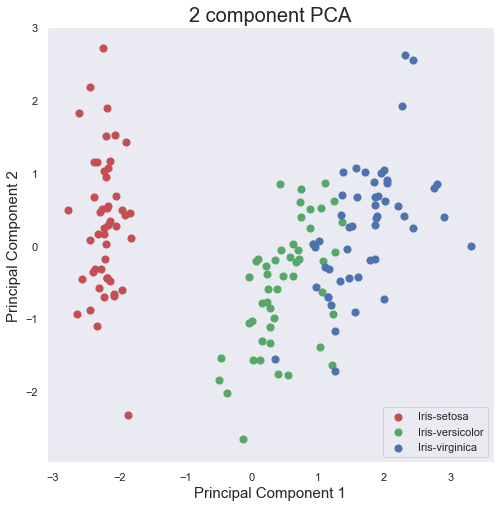

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set(color_codes=True)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [60]:
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523]
